<img src="assets/logo.png">

Made by **Ellák Somfai**, **Balázs Nagy**

[<img src="assets/open_button.png">](https://colab.research.google.com/github/Fortuz/edu_MethodsAndTools/blob/main/practices/P11_EM2.ipynb)

In [ ]:
import numpy as np
from numpy import sqrt, exp, pi, sin, cos
from matplotlib.pyplot import *

rng = np.random.default_rng(42)  # setup random number generator with fixed seed

In [ ]:
# parameters
N = 1000           # total number of data points
P0 = 0.1           # fraction of 0th model points
Mu0 = [1, 1]       # center for 0th model
Mu1 = [2, 5]

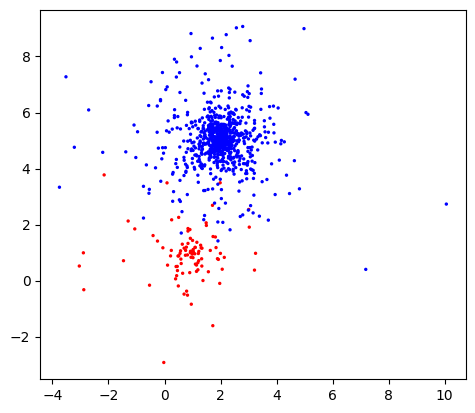

In [ ]:
# generate data
data = []
for n in range(N):
    mu = Mu0 if n < P0 *N else Mu1
    rad = rng.exponential()
    angle = rng.uniform(0, 2*pi)
    data.append((mu[0] + rad * cos(angle), mu[1] + rad * sin(angle)))
data = np.array(data)
# plot
scatter(data[:,0], data[:,1], s=2, c=(np.arange(len(data)) < P0 * N), cmap='bwr')
gca().set_aspect('equal')

In [ ]:
# Euclidean distance
def dist(x, y):
    return sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

# pdf unnormalized: in THIS example normalization is equal for both distributions
def pdf(x, mu):
    return exp(-dist(x, mu))

 0 2.334562,5.16510   2.27898,4.63634   0.50000
 1 1.891109,4.81568   1.81689,4.40900   0.49884
 2 1.895114,4.78238   1.80670,4.41652   0.53395
 3 1.893146,4.75780   1.80269,4.42137   0.56624
 4 1.889555,4.73865   1.80136,4.42494   0.59586
 5 1.885823,4.72320   1.80116,4.42785   0.62306
 6 1.882403,4.71042   1.80144,4.43040   0.64807
 7 1.879393,4.69966   1.80192,4.43273   0.67111
 8 1.876772,4.69049   1.80246,4.43492   0.69236
 9 1.874493,4.68259   1.80303,4.43703   0.71199
10 1.872503,4.67573   1.80361,4.43910   0.73014
11 1.870756,4.66971   1.80419,4.44113   0.74695
12 1.869215,4.66441   1.80477,4.44316   0.76252
13 1.867848,4.65972   1.80536,4.44519   0.77696
14 1.866631,4.65554   1.80596,4.44725   0.79036
15 1.865542,4.65180   1.80656,4.44934   0.80279
16 1.864565,4.64844   1.80718,4.45148   0.81434
17 1.863684,4.64541   1.80782,4.45366   0.82507
18 1.862888,4.64268   1.80847,4.45590   0.83505
19 1.862166,4.64020   1.80914,4.45821   0.84432
20 1.861511,4.63795   1.80983,4.46058   

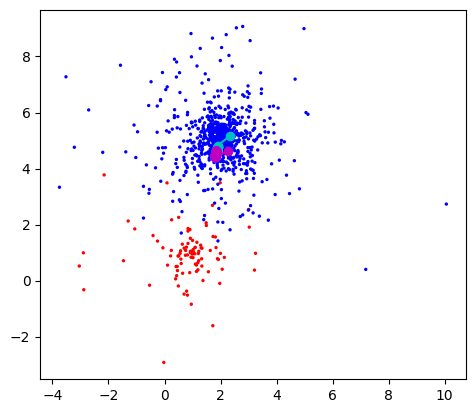

In [ ]:
# EM algorithm

# (1) select initial params
p0 = 0.5
tmp0, tmp1 = rng.choice(N, size=2, replace=False)

mu0 = data[tmp0]
mu1 = data[tmp1]

n_steps = 0
trace = [[mu0,mu1]]
print(f'{n_steps:2d} {mu0[0]:.6f},{mu0[1]:.5f}   {mu1[0]:.5f},{mu1[1]:.5f}   {p0:.5f}')

while True:
    # (2) E step
    gamma = [] # responsibility: n-th data comes from 0th distribution
    for n in range(N):
        gamma.append(p0*pdf(data[n], mu0) / (p0*pdf(data[n], mu0) + (1-p0)*pdf(data[n], mu1)))
    gamma = np.array(gamma)
    # gamma[n]:     responsibility of 0th distribution for data[n].
    # 1 - gamma[n]: responsibility of 1st distribution for data[n]

    # (3) M step
    mu0_new = np.zeros(2)
    mu1_new = np.zeros(2)
    for n in range(N):
        mu0_new += gamma[n]       * data[n]
        mu1_new += (1 - gamma[n]) * data[n]
    p0_new = gamma.sum() / N
    mu0_new /= gamma.sum()
    mu1_new /= (N - gamma.sum())

    n_steps += 1
    print(f'{n_steps:2d} {mu0_new[0]:.6f},{mu0_new[1]:.5f}   {mu1_new[0]:.5f},{mu1_new[1]:.5f}   {p0_new:.5f}')
    trace.append((mu0_new, mu1_new))
    if dist(mu0, mu0_new) + dist(mu1, mu1_new) < 1e-5:
        mu0 = mu0_new
        mu1 = mu1_new
        p0 = p0_new
        break
    mu0 = mu0_new
    mu1 = mu1_new
    p0 = p0_new

# plot
trace = np.array(trace)
plot(trace[:,0,0], trace[:,0,1], 'co-')
plot(trace[:,1,0], trace[:,1,1], 'mo-')
scatter(data[:,0], data[:,1], s=2, c=(np.arange(len(data)) < P0 * N), cmap='bwr')
gca().set_aspect('equal')